<a href="https://colab.research.google.com/github/sahug/time-series/blob/main/TSA%20-%20Basics%20-%20Finance%20and%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSA - Basic - Introduction to Date and Time**

**Import Datasets**

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 176MB/s]
 75% 9.00M/12.0M [00:00<00:00, 71.9MB/s]
100% 12.0M/12.0M [00:00<00:00, 89.2MB/s]


**Unzip**

In [5]:
import zipfile
with zipfile.ZipFile("/content/stock-time-series-20050101-to-20171231.zip", "r") as zip:
  zip.extractall("/content/")

with zipfile.ZipFile("/content/historical-hourly-weather-data.zip", "r") as zip:
  zip.extractall("/content/")  

**Load Dataset**

In [6]:
import pandas as pd

In [12]:
google = pd.read_csv("/content/GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])
humidity = pd.read_csv("/content/humidity.csv", index_col='datetime', parse_dates=['datetime'])

In [21]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [14]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


**Data Preperation**

In [15]:
humidity.isna().sum()

Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [16]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method="ffill")
humidity.isna().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [11]:
google.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

**Visualization**

In [18]:
import matplotlib.pyplot as plt

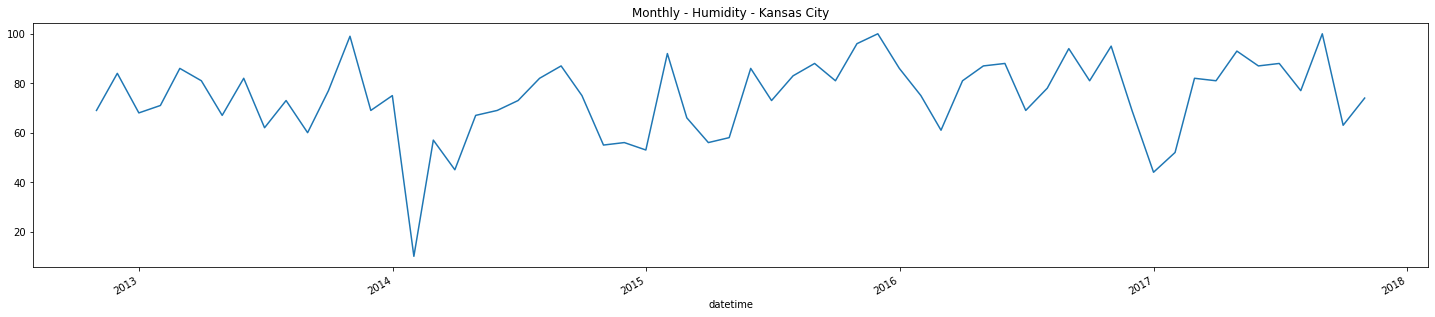

In [20]:
# asfreq - Converts a time series to a specified frequency.
# M - Monthly
plt.figure(figsize=(25, 5))
humidity["Kansas City"].asfreq("M").plot()
plt.title("Monthly - Humidity - Kansas City")
plt.show()

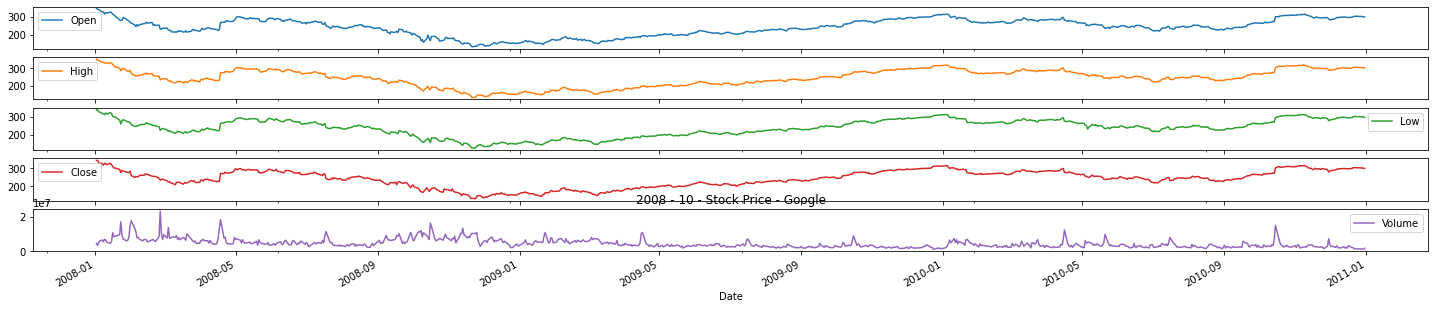

In [55]:
google["2008":"2010"].plot(subplots=True, figsize=(25, 5))
plt.title("2008 - 10 - Stock Price - Google")
plt.show()

**Percent Change**

In [57]:
google.High.shift()

Date
2006-01-03        NaN
2006-01-04     218.05
2006-01-05     224.70
2006-01-06     226.00
2006-01-09     235.49
               ...   
2017-12-22    1077.52
2017-12-26    1071.72
2017-12-27    1068.86
2017-12-28    1068.27
2017-12-29    1064.84
Name: High, Length: 3019, dtype: float64

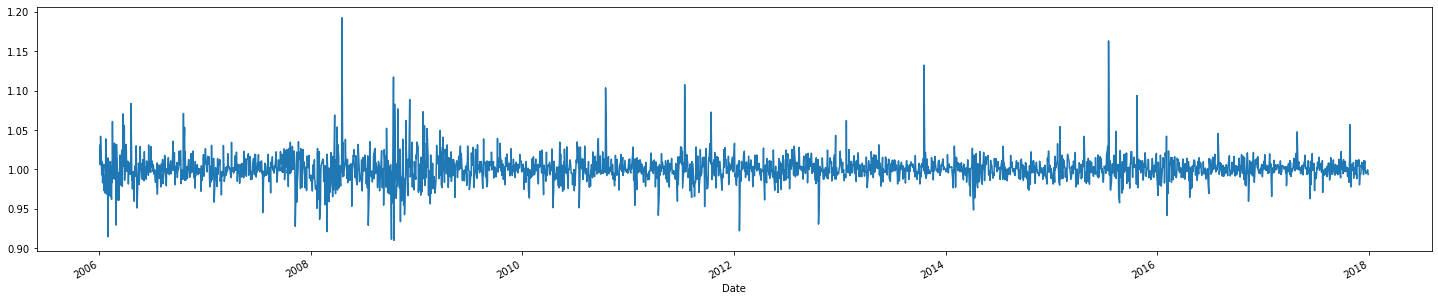

In [56]:
google["Change"] = google.High.div(google.High.shift())
google["Change"].plot(figsize=(25, 5))

**Stock Returns**

In [58]:
google.Change.sub(1).mul(100)

Date
2006-01-03         NaN
2006-01-04    3.049759
2006-01-05    0.578549
2006-01-06    4.199115
2006-01-09    0.615737
                ...   
2017-12-22   -0.538273
2017-12-26   -0.266861
2017-12-27   -0.055199
2017-12-28   -0.321080
2017-12-29   -0.637654
Name: Change, Length: 3019, dtype: float64

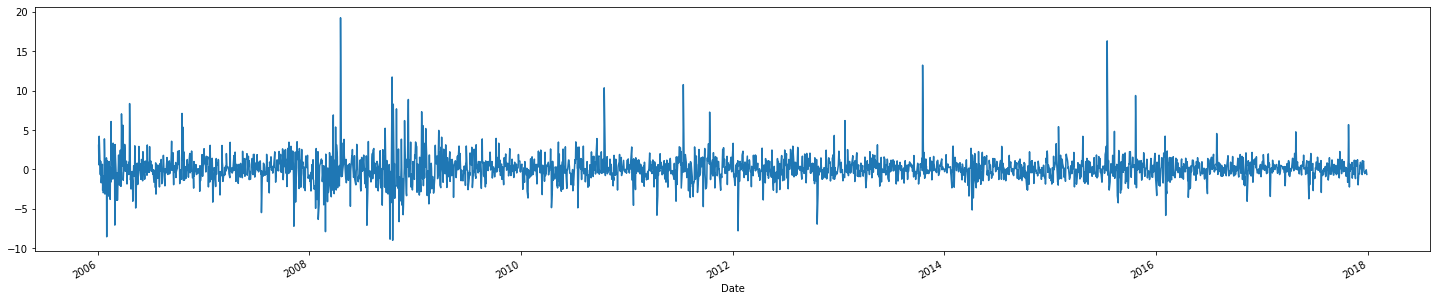

In [59]:
google["Return"] = google.Change.sub(1).mul(100)
google["Return"].plot(figsize=(25, 5))

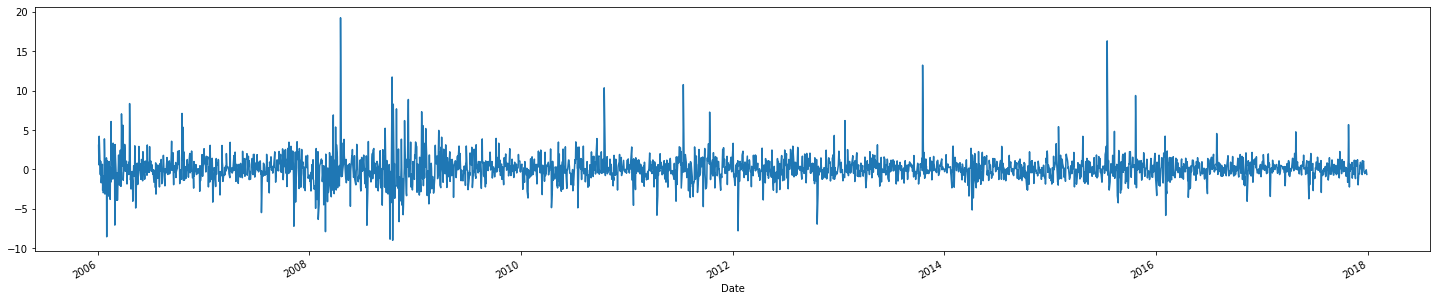

In [60]:
google.High.pct_change().mul(100).plot(figsize=(25, 5))

**Absolute Change in Successive Rows**

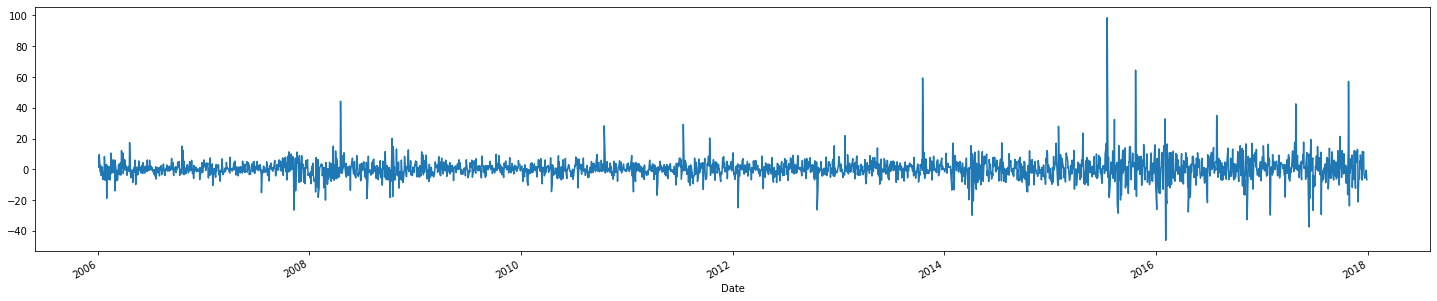

In [61]:
google.High.diff().plot(figsize=(25, 5))

**Compare Timeseries**

In [62]:
microsoft = pd.read_csv("/content/MSFT_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])

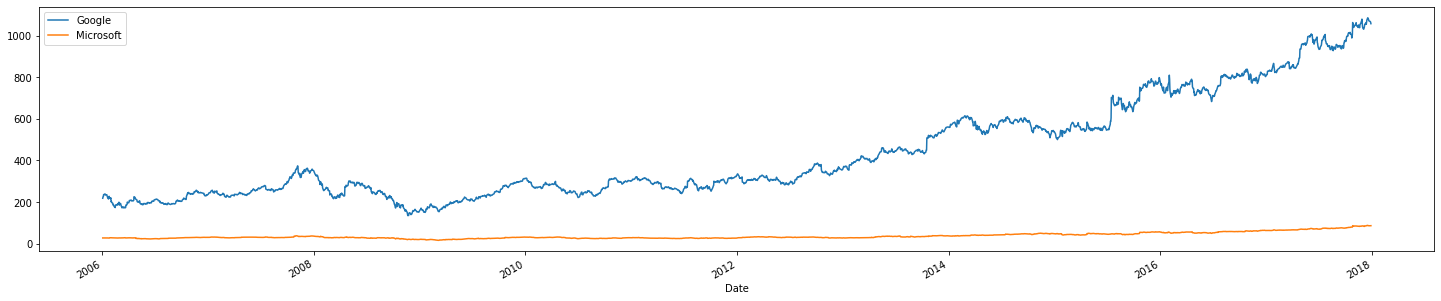

In [64]:
google.High.plot(figsize=(25, 5))
microsoft.High.plot(figsize=(25, 5))
plt.legend(["Google", "Microsoft"])
plt.show()

**Normalize and Compare**

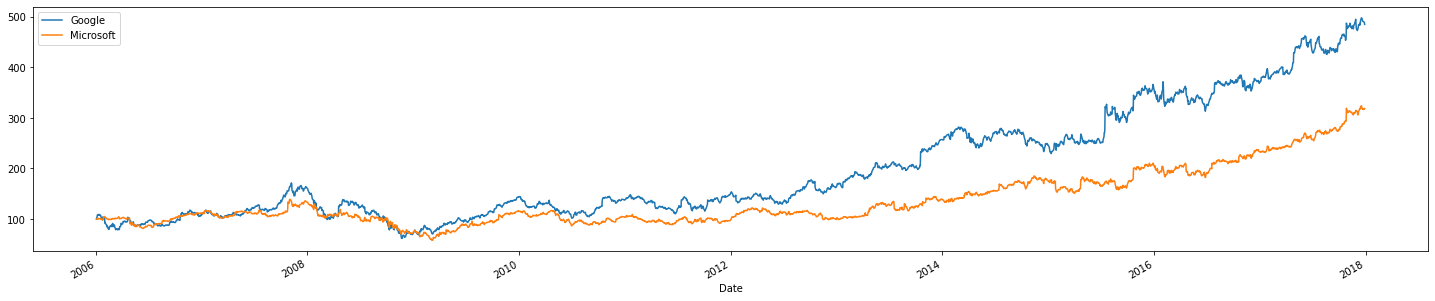

In [66]:
norm_google = google.High.div(google.High.iloc[0]).mul(100)
norm_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
norm_google.plot(figsize=(25, 5))
norm_microsoft.plot(figsize=(25, 5))
plt.legend(["Google", "Microsoft"])
plt.show()

**Window Function**

Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

- **Rolling** - Same size and sliding
- **Expanding** - Contains all prior values

**Rolling**

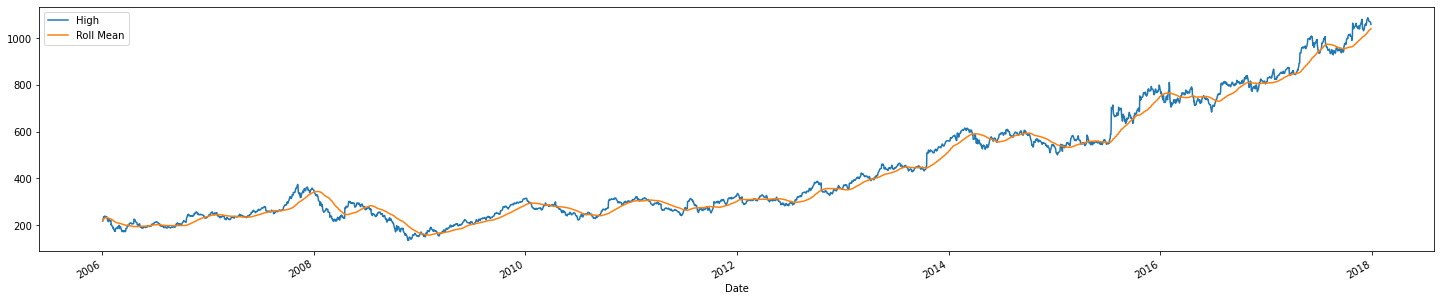

In [69]:
roll_google = google.High.rolling("90D").mean()
google.High.plot(figsize=(25, 5))
roll_google.plot(figsize=(25, 5))
plt.legend(["High", "Roll Mean"])
plt.show()

**Expanding**

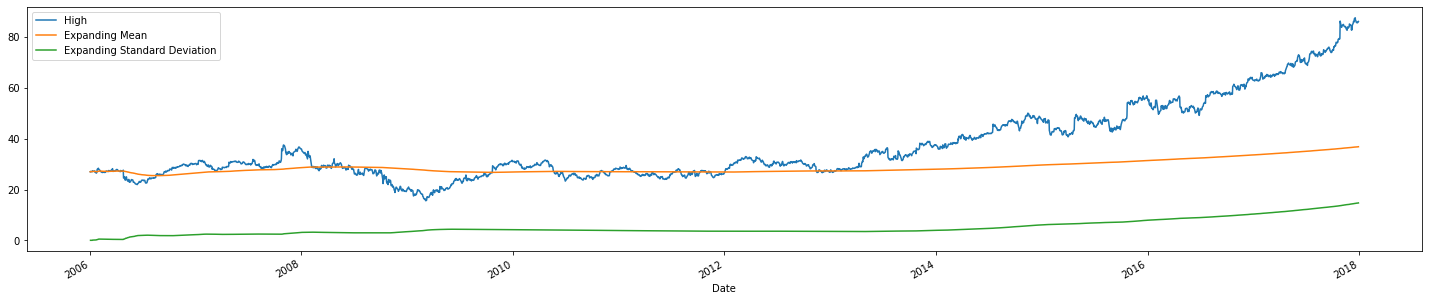

In [70]:
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot(figsize=(25, 5))
microsoft_mean.plot(figsize=(25, 5))
microsoft_std.plot(figsize=(25, 5))
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

**OHLC Charts**

An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period.

In [74]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff

OHLC Chart - June 2008

In [75]:
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

OHLC Chart - 2008

In [76]:
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

OHLC Chart - Per Year

In [77]:
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

**Candlestick Charts**

This type of chart is used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc.

Candlestick Chart - March 2008

In [78]:
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

Candlestick Chart - 2008

In [79]:
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

Candlestick Chart - Per Year

In [80]:
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

**Autocorrelation**

**Autocorrelation** - The Autocorrelation Function (ACF) measures how a series is correlated with itself at different lags.

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



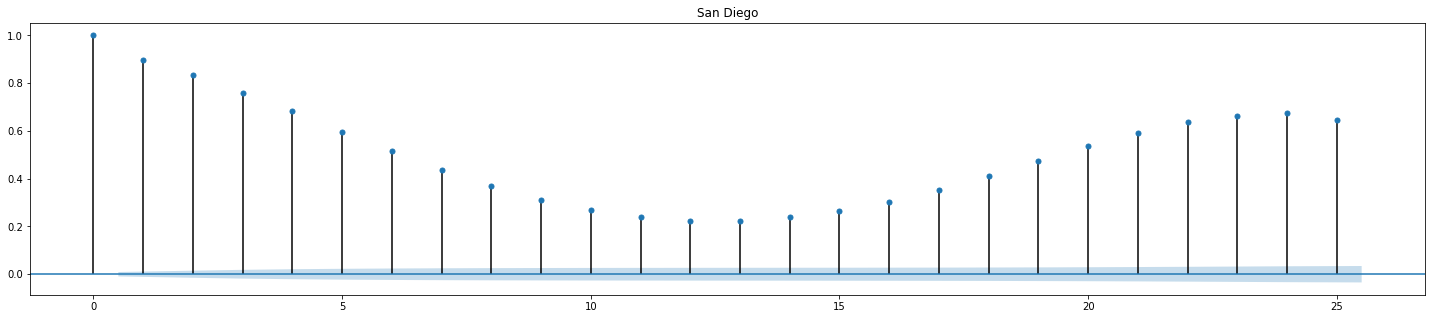

In [82]:
plt.rc("figure", figsize=(25, 5))
plot_acf(humidity["San Diego"], lags=25, title="San Diego")
plt.show()

**Partial Autocorrelation**

The Partial Autocorrelation Function (PCF) can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

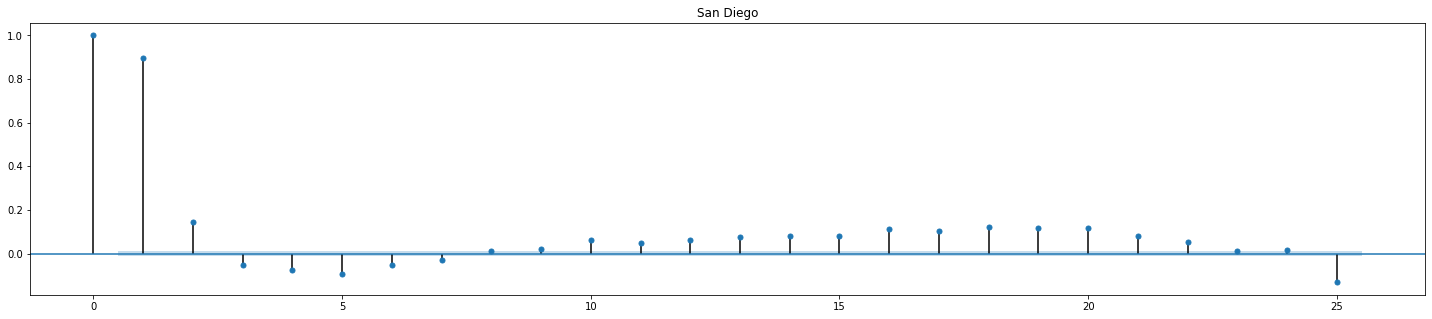

In [83]:
plt.rc("figure", figsize=(25, 5))
plot_pacf(humidity["San Diego"], lags=25, title="San Diego")
plt.show()